In [20]:
import os
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import csv
import json
import pandas as pd

In [21]:
# Load the CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [25]:
# Directory containing your images
image_dir = 'screenshots'

# CSV file to save embeddings
csv_file = 'image_embeddings.csv'

# Open a CSV file for writing
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(["Filename", "Embeddings"])
    
    # Loop through all images in the directory
    for image_name in os.listdir(image_dir):
        # Make sure to process only files with a .jpg or .png extension
        if image_name.endswith('.jpg') or image_name.endswith('.png'):
            image_path = os.path.join(image_dir, image_name)
            
            # Open the image
            image = Image.open(image_path)
            
            # Process the image for the CLIP model
            inputs = processor(images=image, return_tensors="pt", padding=True)
            
            # Generate embeddings
            with torch.no_grad():
                embeddings = model.get_image_features(**inputs).numpy()
                
            # Convert the embeddings to a list for CSV writing
            embeddings_list = embeddings.flatten().tolist()
            
            # Write the filename and embeddings to the CSV file
            writer.writerow([image_name, embeddings_list])

print("Embeddings have been saved to", csv_file)

Embeddings have been saved to image_embeddings.csv


In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('embeddings/image_embeddings.csv')

# Assuming embeddings are in the second column and are stored as strings
# Example of embedding: "[0.23, 0.35, 0.11]"
import ast  # ast.literal_eval safely evaluates a string containing a Python literal expression

df['embeddings'] = df['Embeddings'].apply(ast.literal_eval)
# Accessing the embedding for the first row
first_embedding = df.loc[0, 'embeddings']
print(first_embedding)
print(len(first_embedding))

[-0.29299911856651306, -0.24236251413822174, -0.08342461287975311, -0.46731022000312805, 0.17175191640853882, -0.6144365668296814, 0.050357967615127563, 0.6644703149795532, 0.9215517044067383, -0.10427722334861755, 0.3126069903373718, -0.20633041858673096, -0.8325822949409485, -0.4152643382549286, -0.102508544921875, 0.05112642049789429, -0.5552076697349548, -0.26692235469818115, -0.0949239432811737, -0.057202622294425964, -0.24518036842346191, -0.5673624277114868, 0.09919030964374542, -0.159003347158432, 0.2435503602027893, 0.06483319401741028, -0.022691786289215088, 0.07246550917625427, 0.14191289246082306, 0.05346570163965225, 0.2500624358654022, -0.10493884235620499, 0.2194877713918686, 0.20308303833007812, 0.29780036211013794, -0.35999947786331177, -0.32517102360725403, -0.09154203534126282, -0.3530856966972351, -1.3351821899414062, -0.00230446457862854, 0.10342222452163696, -0.05525994300842285, -0.6574844717979431, -0.14613592624664307, 0.37750765681266785, 0.5655860900878906, -

/Users/huyennguyen/anaconda3/envs/embs_venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/huyennguyen/anaconda3/envs/embs_venv/lib/python3.12/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


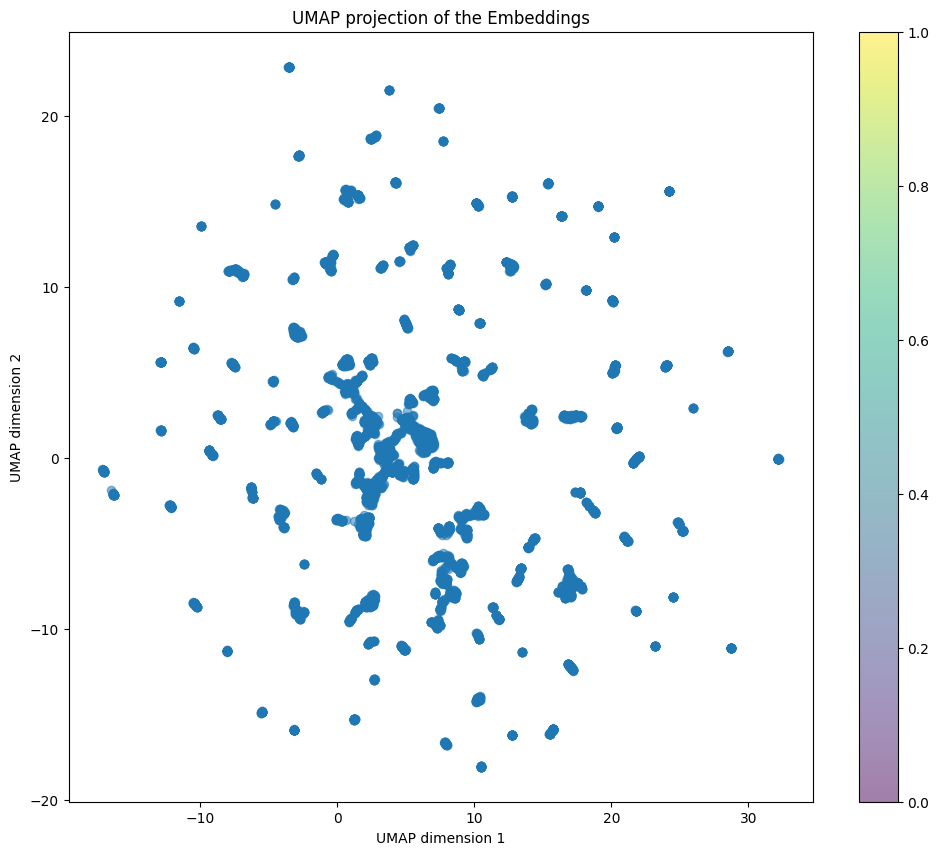

In [5]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains an 'embeddings' column with your embeddings data
# Convert embeddings list into a proper format if necessary
embeddings = list(df['embeddings'])

# Initialize UMAP. Reduce dimensionality to 2D for easy visualization.
reducer = umap.UMAP(random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

# Plotting the results
plt.figure(figsize=(12, 10))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.5)
plt.title('UMAP projection of the Embeddings')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.colorbar()
plt.show()
